**EMPEZAR A TRABAJAR PARA EL PARCIAL**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 34.4 MB/s 


Una base de datos que tiene dos categoria: 
1. El Evento de interes
2. El Evento de no interes 
 



In [3]:
import wfdb
import numpy as np

[[-0.375  0.05 ]
 [-0.375  0.05 ]
 [-0.375  0.05 ]
 ...
 [-0.235  0.05 ]
 [-0.245  0.055]
 [ 0.     0.   ]]


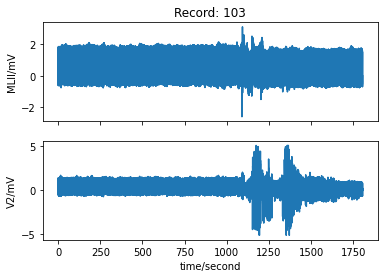

In [4]:
pepito = wfdb.rdrecord("database/103")
print(pepito)
print(pepito.p_signal) #Vector de los datos

wfdb.plot_wfdb(pepito)

In [5]:
signals = pepito.p_signal
#print(signals)
#len(signals)
#Se tiene 18 seg y 650000 datos, entonces se tiene 361 muestras aprox. por cada segundo
#Los datos contienen eventos de no interes que son las anotaciones
anotaciones = wfdb.rdann('database/103','atr').sample  #la muestra en donde esta latido
#print(anotaciones)
#print(len(anotaciones)) #cantidad total de latidos
#print(signals[21,1])
#Abrir una ventana e ingresar en la cateogia del evento de interes en el database

#las anotaciones son latidos
signals1 = signals[:,0]
Vobser = signals1[anotaciones[1]-70: anotaciones[1]+70]
print(Vobser)
#latidos que tienen rango hasta las 140 muestras, ese es un N cualquiera, minimo 50 muestras
#Se guarda en la database los eventos de interes de lo que se reconoce como latido
#Se gurda  en la databse los eventod de no interes

[-0.235 -0.245 -0.24  -0.235 -0.215 -0.215 -0.215 -0.23  -0.22  -0.21
 -0.205 -0.215 -0.215 -0.245 -0.255 -0.25  -0.26  -0.27  -0.27  -0.27
 -0.255 -0.25  -0.255 -0.26  -0.295 -0.315 -0.32  -0.325 -0.33  -0.34
 -0.355 -0.38  -0.385 -0.38  -0.38  -0.395 -0.41  -0.405 -0.41  -0.405
 -0.4   -0.39  -0.405 -0.42  -0.41  -0.4   -0.4   -0.395 -0.405 -0.41
 -0.405 -0.4   -0.405 -0.405 -0.42  -0.445 -0.475 -0.54  -0.58  -0.59
 -0.55  -0.485 -0.39  -0.21   0.09   0.47   0.85   1.19   1.51   1.75
  1.85   1.8    1.585  1.14   0.62   0.13  -0.235 -0.44  -0.52  -0.525
 -0.485 -0.405 -0.33  -0.295 -0.32  -0.36  -0.375 -0.375 -0.38  -0.38
 -0.395 -0.42  -0.43  -0.435 -0.43  -0.435 -0.45  -0.465 -0.46  -0.45
 -0.445 -0.46  -0.465 -0.485 -0.47  -0.455 -0.465 -0.46  -0.47  -0.475
 -0.465 -0.475 -0.475 -0.47  -0.465 -0.485 -0.47  -0.46  -0.455 -0.44
 -0.46  -0.47  -0.45  -0.43  -0.435 -0.435 -0.435 -0.44  -0.425 -0.41
 -0.395 -0.39  -0.4   -0.4   -0.39  -0.37  -0.345 -0.34  -0.34  -0.345]


%Solapamiento - Ventana Deslizante

In [17]:

inicio = 0
final = 15

signals1=signals[:,0]
#print(len(signals1))

medias = []
des = []

while(final != (len(signals)+7)):

  temp = signals1[inicio:final]

  if inicio==0:
      for i in range(0,15):
        medias.append(np.mean(temp))
        des.append(np.std(temp))
  else:
      for i in range(0,7):
        medias.append(np.mean(temp))
        des.append(np.std(temp))

  

  inicio+=7
  final +=7

print(len(medias))

650000


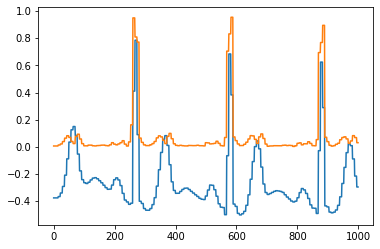

In [19]:
import matplotlib.pyplot as plt
plt.plot(medias[:1000])
plt.plot(des[:1000])